# Sales Data Analysis Project

This project analyzes timestamped sales data to uncover trends, detect statistically significant changes, and understand gender and time-of-day purchasing patterns.

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Directory containing your files
directory = "./datasets"

# Get a list of all CSV files in the directory
file_list = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Load and concatenate all files
dataframes = [pd.read_csv(file) for file in file_list]
sales_data = pd.concat(dataframes, ignore_index=True)

# Convert 'sale_time' to datetime for analysis
sales_data['sale_time'] = pd.to_datetime(sales_data['sale_time'])

# Display combined dataset info
print(sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204329 entries, 0 to 204328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sale_time         204329 non-null  datetime64[ns]
 1   purchaser_gender  204329 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.1+ MB
None


In [4]:
sales_data.shape[0]

204329

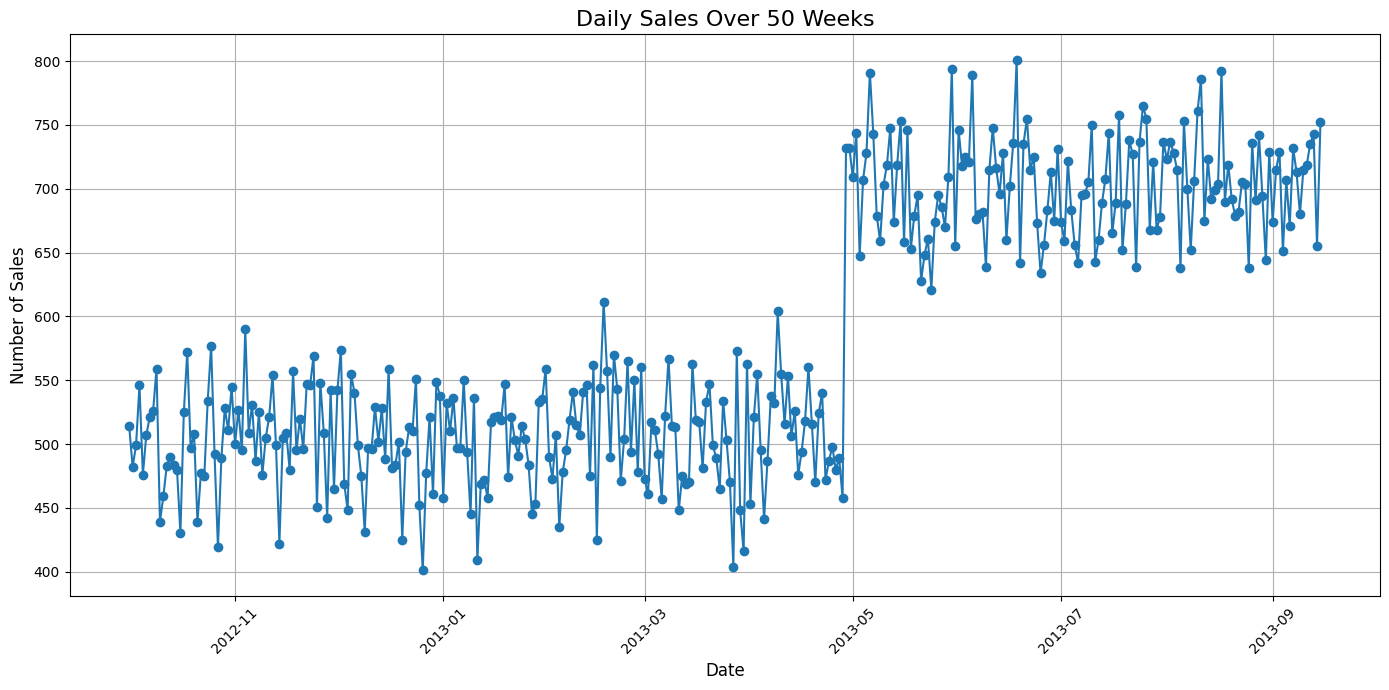

In [7]:
# plot daily sales
import matplotlib.pyplot as plt

daily_sales = sales_data.groupby(sales_data['sale_time'].dt.date).size()

plt.figure(figsize=(14, 7))
daily_sales.plot(kind='line', marker='o')
plt.title('Daily Sales Over 50 Weeks', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Calculate the daily change in sales to identify sudden changes
daily_sales_change = daily_sales.diff().abs()

# Find the date with the maximum change in sales
sudden_change_date = daily_sales_change.idxmax()
sudden_change_value = daily_sales_change.max()

sudden_change_date, sudden_change_value

(datetime.date(2013, 4, 29), np.float64(274.0))

In [9]:
from scipy.stats import ttest_ind

# Separate data before and after the sudden change date
before_change = daily_sales[daily_sales.index < sudden_change_date]
after_change = daily_sales[daily_sales.index >= sudden_change_date]

# Perform a t-test to determine statistical significance
t_stat, p_value = ttest_ind(before_change, after_change, equal_var=False)

t_stat, p_value

(np.float64(-45.943533193935615), np.float64(3.487246853115062e-138))

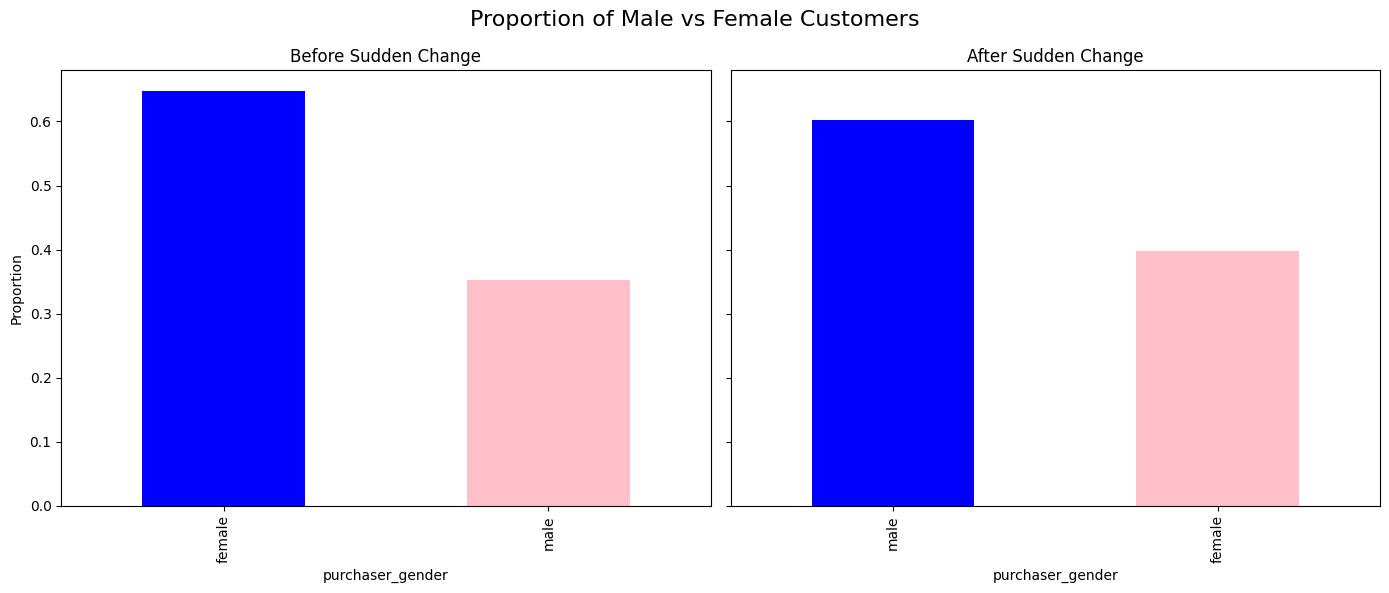

(purchaser_gender
 female    0.64753
 male      0.35247
 Name: proportion, dtype: float64,
 purchaser_gender
 male      0.602144
 female    0.397856
 Name: proportion, dtype: float64)

In [10]:
# Calculate the proportion of male and female customers before and after the sudden change date
gender_proportion_before = sales_data[sales_data['sale_time'].dt.date < sudden_change_date]['purchaser_gender'].value_counts(normalize=True)
gender_proportion_after = sales_data[sales_data['sale_time'].dt.date >= sudden_change_date]['purchaser_gender'].value_counts(normalize=True)

# Plot gender proportions
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

gender_proportion_before.plot(kind='bar', ax=ax[0], color=['blue', 'pink'], title='Before Sudden Change', ylabel='Proportion')
gender_proportion_after.plot(kind='bar', ax=ax[1], color=['blue', 'pink'], title='After Sudden Change', ylabel='Proportion')

plt.suptitle('Proportion of Male vs Female Customers', fontsize=16)
plt.tight_layout()
plt.show()

gender_proportion_before, gender_proportion_after


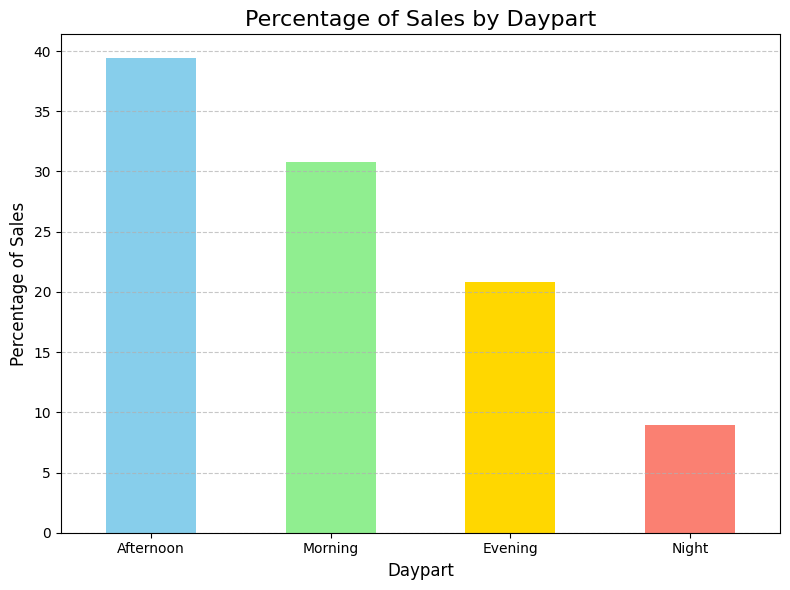

daypart
Afternoon    39.413397
Morning      30.769005
Evening      20.858517
Night         8.959081
Name: proportion, dtype: float64

In [11]:
# Define dayparts
def get_daypart(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Assign dayparts based on the sale_time
sales_data['daypart'] = sales_data['sale_time'].dt.hour.map(get_daypart)

# Calculate the percentage of sales in each daypart
daypart_percentage = sales_data['daypart'].value_counts(normalize=True) * 100

# Plot daypart percentages
plt.figure(figsize=(8, 6))
daypart_percentage.plot(kind='bar', color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.title('Percentage of Sales by Daypart', fontsize=16)
plt.xlabel('Daypart', fontsize=12)
plt.ylabel('Percentage of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

daypart_percentage
